<a href="https://colab.research.google.com/github/samihahaha/CSIT696/blob/main/2_SentimentAnalysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
daily_sentiment = pd.read_csv('processed_tesla_sentiment.csv')

tesla_stock = pd.read_csv('tesla_stock_price_for_sentiment_alignment.csv')

In [4]:
daily_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             37422 non-null  object 
 1   Tweet            37422 non-null  object 
 2   Stock Name       37422 non-null  object 
 3   Company Name     37422 non-null  object 
 4   sentiment        37422 non-null  object 
 5   sentiment_score  37422 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [5]:
daily_sentiment.head()

,Date,Tweet,Stock Name,Company Name,sentiment,sentiment_score
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",negative,0.528979
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",neutral,0.719147
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",neutral,0.838153
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",negative,0.913476
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",negative,0.971595


In [44]:
tesla_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


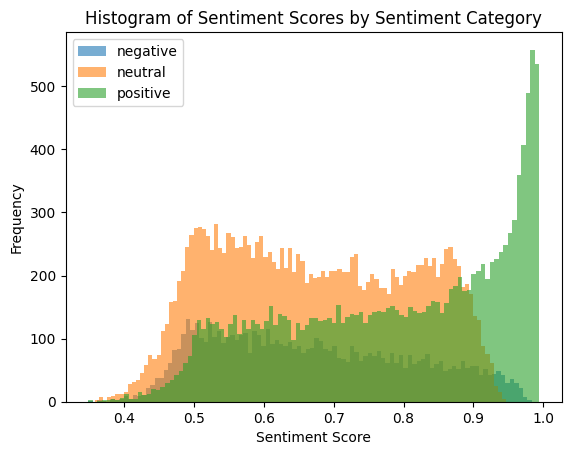

In [45]:
import matplotlib.pyplot as plt
daily_sentiment.groupby('sentiment')['sentiment_score'].plot(kind='hist', bins=100, alpha=0.6, legend=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Scores by Sentiment Category')
plt.show()


In [46]:
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])

# Aggregate sentiment scores by date
# Here, we choose mean sentiment score; you can also use median or other statistics
#aggregated_sentiment = daily_sentiment.groupby('Date')['sentiment_score'].mean().reset_index()

In [47]:
daily_sentiment['Date'] = daily_sentiment['Date'].dt.tz_localize(None)


In [48]:
daily_sentiment.head()

,Date,Tweet,Stock Name,Company Name,sentiment,sentiment_score
0,2022-09-29 23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",negative,0.528979
1,2022-09-29 23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",neutral,0.719147
2,2022-09-29 23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",neutral,0.838153
3,2022-09-29 22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",negative,0.913476
4,2022-09-29 22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",negative,0.971595


In [49]:
aggregated_sentiment = daily_sentiment.groupby('Date')['sentiment_score'].mean().reset_index()

In [50]:
aggregated_sentiment.head()

,Date,sentiment_score
0,2021-09-30 01:16:13,0.761609
1,2021-09-30 01:38:26,0.787107
2,2021-09-30 01:59:02,0.788975
3,2021-09-30 02:40:26,0.628954
4,2021-09-30 02:52:38,0.880523


In [51]:
print(tesla_stock['Date'].dtype)
print(aggregated_sentiment['Date'].dtype)

datetime64[ns]
datetime64[ns]


In [52]:
aggregated_sentiment['Date'] = pd.to_datetime(aggregated_sentiment['Date'])

In [53]:
# Convert datetime to date (removes time)
aggregated_sentiment['Date'] = aggregated_sentiment['Date'].dt.date


In [54]:
unique_values_count = aggregated_sentiment['Date'].nunique()

print("Number of unique values in 'Column_Name':", unique_values_count)

Number of unique values in 'Column_Name': 365


In [55]:
daily_mean_sentiment = aggregated_sentiment.groupby('Date')['sentiment_score'].mean().reset_index()

In [56]:
daily_mean_sentiment.head()

,Date,sentiment_score
0,2021-09-30,0.717376
1,2021-10-01,0.704034
2,2021-10-02,0.749092
3,2021-10-03,0.736093
4,2021-10-04,0.699326


In [57]:
unique_values_count = daily_mean_sentiment['Date'].nunique()

print("Number of unique values in 'Column_Name':", unique_values_count)

Number of unique values in 'Column_Name': 365


In [58]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date']).dt.date
merged_df = pd.merge(tesla_stock, daily_mean_sentiment, on='Date', how='inner')
print(merged_df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
1  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
3  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
4  2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   

     Volume  sentiment_score  
0  53868000         0.717376  
1  51094200         0.704034  
2  91449900         0.699326  
3  55297800         0.713094  
4  43898400         0.719904  


In [59]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             251 non-null    object 
 1   Open             251 non-null    float64
 2   High             251 non-null    float64
 3   Low              251 non-null    float64
 4   Close            251 non-null    float64
 5   Adj Close        251 non-null    float64
 6   Volume           251 non-null    int64  
 7   sentiment_score  251 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.8+ KB


In [60]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

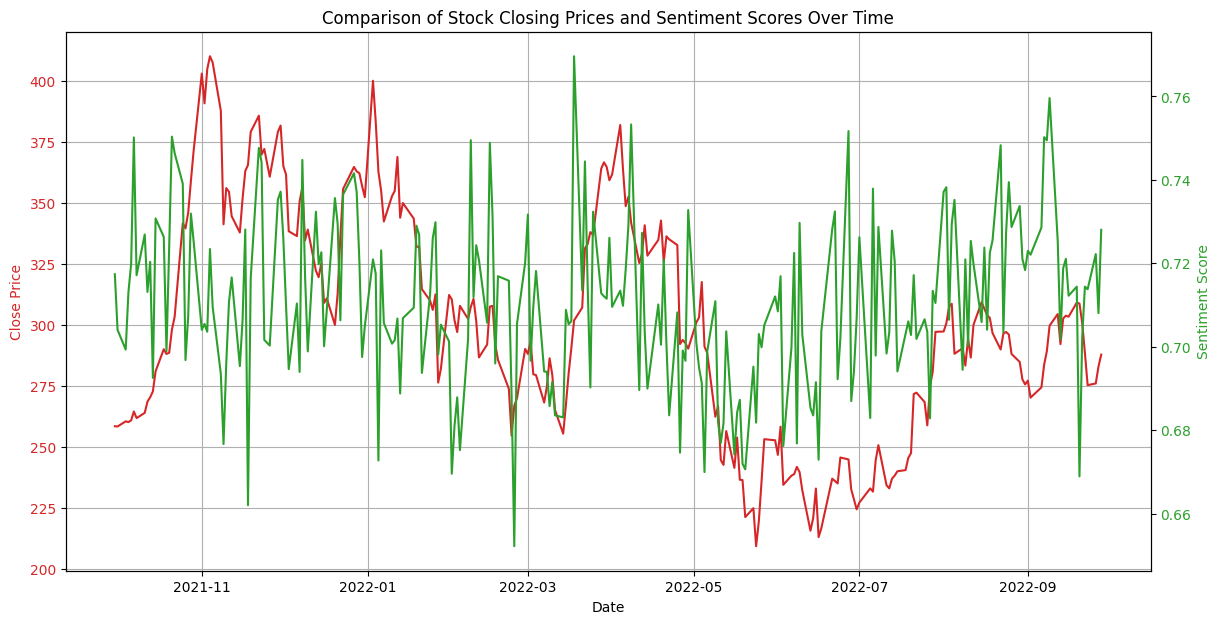

In [61]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotting the closing prices on the primary y-axis
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color=color)
ax1.plot(merged_df.index, merged_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the sentiment scores
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Sentiment Score', color=color)
ax2.plot(merged_df.index, merged_df['sentiment_score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and customizing grid
plt.title('Comparison of Stock Closing Prices and Sentiment Scores Over Time')
ax1.grid(True)

# Show plot
plt.show()


In [62]:
correlation = merged_df[['Close', 'sentiment_score']].corr()
print(correlation)

                    Close  sentiment_score
Close            1.000000         0.209142
sentiment_score  0.209142         1.000000


In [20]:
!pip install neuralprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.5/829.5 kB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 47.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

In [32]:
df = merged_df

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,sentiment_score
Date,,,,,,,
2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.717376
2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.704034
2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.699326
2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.713094
2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.719904


In [30]:
print(merged_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   
2021-10-06  258.733337  262.220001  257.739990  260.916656  260.916656   

              Volume  sentiment_score  
Date                                   
2021-09-30  53868000         0.717376  
2021-10-01  51094200         0.704034  
2021-10-04  91449900         0.699326  
2021-10-05  55297800         0.713094  
2021-10-06  43898400         0.719904  


In [37]:
merged_df.reset_index(inplace=True)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             251 non-null    datetime64[ns]
 1   Open             251 non-null    float64       
 2   High             251 non-null    float64       
 3   Low              251 non-null    float64       
 4   Close            251 non-null    float64       
 5   Adj Close        251 non-null    float64       
 6   Volume           251 non-null    int64         
 7   sentiment_score  251 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 15.8 KB


In [39]:
merged_df['ds'] = pd.to_datetime(merged_df['Date'])
merged_df['y'] = merged_df['Close']  # Assuming you want to predict the 'Close' price

# Ensure 'sentiment_score' is ready to be used as a regressor
print(merged_df[['ds', 'y', 'sentiment_score']].head())

          ds           y  sentiment_score
0 2021-09-30  258.493347         0.717376
1 2021-10-01  258.406677         0.704034
2 2021-10-04  260.510010         0.699326
3 2021-10-05  260.196655         0.713094
4 2021-10-06  260.916656         0.719904


In [40]:
merged_df[['ds', 'y', 'sentiment_score']].to_csv('final_merge.csv')

In [41]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,ds,y
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,0.717376,2021-09-30,258.493347
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,0.704034,2021-10-01,258.406677
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,0.699326,2021-10-04,260.510010
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,0.713094,2021-10-05,260.196655
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,0.719904,2021-10-06,260.916656


In [43]:
from neuralprophet import NeuralProphet

model = NeuralProphet()
model.add_lagged_regressor('sentiment_score')


INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO:NP.forecaster:n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1


In [66]:
merged_df = pd.read_csv('final_merge.csv')

In [67]:
merged_df.head()

,Unnamed: 0,ds,y,sentiment_score
0,0,2021-09-30,258.493347,0.717376
1,1,2021-10-01,258.406677,0.704034
2,2,2021-10-04,260.510010,0.699326
3,3,2021-10-05,260.196655,0.713094
4,4,2021-10-06,260.916656,0.719904


In [68]:
columns_to_drop = [col for col in merged_df.columns if col not in ['ds', 'y', 'sentiment_score']]
merged_df.drop(columns=columns_to_drop, inplace=True)

In [113]:
merged_df.head()

,ds,y,sentiment_score
0,2021-09-30,258.493347,0.717376
1,2021-10-01,258.406677,0.704034
2,2021-10-04,260.510010,0.699326
3,2021-10-05,260.196655,0.713094
4,2021-10-06,260.916656,0.719904


In [114]:
split_point = int(0.8 * len(merged_df))
train_df = merged_df.iloc[:split_point]
val_df = merged_df.iloc[split_point:]


In [115]:
print(train_df.head())

           ds           y  sentiment_score
0  2021-09-30  258.493347         0.717376
1  2021-10-01  258.406677         0.704034
2  2021-10-04  260.510010         0.699326
3  2021-10-05  260.196655         0.713094
4  2021-10-06  260.916656         0.719904


In [116]:
m  = NeuralProphet()
m.add_lagged_regressor('sentiment_score')
metrics = m.fit(train_df)


INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO:NP.forecaster:n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.5% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO:NP.df_utils:Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run N

Finding best initial lr:   0%|          | 0/211 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [117]:
print(metrics)

        MAE_val    RMSE_val  Loss_val  RegLoss_val  epoch         MAE  \
0    284.606750  315.095612  1.502658          0.0      0  233.300064   
1    256.772369  289.474701  1.341493          0.0      1  215.327942   
2    228.616013  263.701721  1.180564          0.0      2  197.698456   
3    200.022064  237.104568  1.020974          0.0      3  179.101349   
4    172.312836  210.380875  0.864353          0.0      4  162.520432   
..          ...         ...       ...          ...    ...         ...   
185  108.611214  111.745010  0.480979          0.0    185   20.162071   
186  108.634705  111.767792  0.481111          0.0    186   20.340015   
187  108.778175  111.908440  0.481941          0.0    187   20.304869   
188  108.785759  111.915222  0.481983          0.0    188   20.237122   
189  108.867859  111.994812  0.482453          0.0    189   20.164660   

           RMSE      Loss  RegLoss  
0    268.485107  0.915665      0.0  
1    252.605942  0.839197      0.0  
2    235.605

In [118]:
train_df.head()

,ds,y,sentiment_score
0,2021-09-30,258.493347,0.717376
1,2021-10-01,258.406677,0.704034
2,2021-10-04,260.510010,0.699326
3,2021-10-05,260.196655,0.713094
4,2021-10-06,260.916656,0.719904


In [119]:

train_df.set_index('ds', inplace=True)



# Reset the index so 'ds' becomes a column again
train_df.reset_index(inplace=True)

In [120]:
# Using .loc to ensure proper assignment and avoid SettingWithCopyWarning
train_df.loc[:, 'y'] = train_df['y'].fillna(method='ffill')
train_df.loc[:, 'sentiment_score'] = train_df['sentiment_score'].fillna(method='ffill')


In [121]:
# Check for NaN values at the end of your dataframe
print(train_df.tail())

# Fill missing values using forward fill (ffill) or another appropriate method
train_df.fillna(method='ffill', inplace=True)  # Forward fill to propagate last valid observation forward


WARNING - (py.warnings._showwarnmsg) - <ipython-input-121-06c72913242e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.fillna(method='ffill', inplace=True)  # Forward fill to propagate last valid observation forward

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.fillna(method='ffill', inplace=True)  # Forward fill to propagate last valid observation forward



             ds           y  sentiment_score
195  2022-07-12  233.070007         0.703494
196  2022-07-13  237.039993         0.727826
197  2022-07-14  238.313339         0.720443
198  2022-07-15  240.066666         0.694101
199  2022-07-18  240.546661         0.703101


In [122]:
future = model.make_future_dataframe(train_df, periods=60)  # Predict 60 days into the future


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.5% of the data.
INFO:NP.df_utils:Major frequency B corresponds to 95.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.data.splitting._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 1.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [125]:
future.tail()

,ds,y,sentiment_score
0,2022-07-18,240.546661,0.703101
1,2022-07-19,NaN,NaN


In [123]:
forecast = model.predict(future)


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 50.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 50.0% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 50.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore                     message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA,                         or, BAS.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
INFO:NP.da

Predicting: 13it [00:00, ?it/s]

ValueError: Length of values (3) does not match length of index (2)